# Unsupervised Learning - Denetimsiz Öğrenme

Denetimsiz öğrenme, algoritmanın etiketlenmemiş veri setlerinden desenler ve ilişkiler çıkarmaya çalıştığı bir makine öğrenimi türüdür. Etiketler veya hedef çıkışlar önceden verilmez, algoritma kendi başına örüntüleri tanımlar. Bu tür öğrenme genellikle kümeleme (benzer örnekleri gruplama) veya boyutsal azaltma (özellik sayısını azaltma) gibi görevlerde kullanılır. Etiketleme maliyeti yüksek veya mümkün değilse, denetimsiz öğrenme özellikle faydalıdır. Yani bağımlı değişkeni yoktur. Sadece bağımsız değişkenlerden oluşur.

Bu uygulamaya başlamadan aşağıdaki kurulumu gerçekleştirmeniz gerekmektedir.

In [1]:
#!pip install yellowbrick

In [2]:
# Gerekli kütüphaneler
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder


# K-Means (K-Ortalamalar)

Unsupervised learning (Denetimsiz Öğrenme), makine öğrenimi alanında bir tür öğrenme paradigmasıdır. Bu öğrenme tipinde, algoritma eğitim veri setindeki örnekleri etiketlenmemiş veya kategorize edilmemiş bir şekilde analiz eder. Yani, algoritmanın öğrenme sürecinde doğru çıkışlar veya hedef değerler verilmez. Bu nedenle, algoritmanın kendi başına desenleri ve ilişkileri bulması gerekmektedir.

Denetimsiz öğrenme, veri setindeki yapıları anlamak, benzer örnekleri gruplamak veya veri setindeki gizli özellikleri çıkarmak gibi görevler için kullanılır. Bu öğrenme türü, özellikle büyük ve karmaşık veri setleriyle çalışma veya veri setindeki desenleri anlama amacı güden uygulamalarda yaygın olarak kullanılır.

Denetimsiz öğrenme genellikle iki ana kategori altında incelenir:

1. **Kümeleme (Clustering):** Veri setindeki benzer örnekleri gruplamak için kullanılır. K-means gibi algoritmalar kümeleme görevleri için sıkça kullanılır. Bu tür algoritmalar, veri setindeki örnekleri birbirine benzeyen gruplara ayırmaya çalışır.

2. **Boyutsal Azaltma (Dimensionality Reduction):** Veri setindeki özellik sayısını azaltarak, veri setini daha anlaşılır ve işlenebilir hale getirmek amacıyla kullanılır. PCA (Principal Component Analysis) gibi algoritmalar, veri setindeki değişkenleri daha az sayıda özellikle ifade eden bir alt kümeyle değiştirir.

Denetimsiz öğrenme, veri madenciliği, desen tanıma, doğal dil işleme ve birçok uygulama alanında kullanılmaktadır. Bu öğrenme türü, özellikle etiketleme maliyeti yüksek veya etiketleme imkansız olduğu durumlarda kullanışlıdır.

**Eyaletleri suç istatistiklerine göre gruplara ayırma işlemi yapacağız.**

In [3]:
# Veri setinin okutulması
df = pd.read_csv("datasets/USArrests.csv", index_col=0)

# İlk 5 gözlemi göster
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
# Eksik veri kontrolü
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Eksik değer yok gibi gözüküyor.

In [5]:
# Veri seti bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
# Temel istatistiksel bilgiler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


Uzaklık temelli yöntemlerde değişkenlerin standartlaştırılması önemlidir. Bu nedenle verileri standartlaştıralım;

In [7]:
# Veriyi normalize etme
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [8]:
# KMeans modelini oluşturma ve eğitme
kmeans = KMeans(n_clusters=4, random_state=17).fit(df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
# KMeans modelinin parametreleri
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [10]:
# Oluşturulan küme sayısı
kmeans.n_clusters

4

In [11]:
# Küme merkezleri
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [12]:
# Her bir gözlemin ait olduğu küme etiketleri
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [13]:
# Küme içi toplam karesel mesafe
kmeans.inertia_

3.683456153585913

K-means kümeleme algoritması sırasında, her küme için belirlenen merkez noktalar ile bu merkezlere olan uzaklıklar arasındaki toplam mesafeye **"inertia"** denir. Inertia, bir kümeleme **modelinin başarısını ölçen bir metriktir**. Amacı, küme merkezlerinin, kendilerine en yakın veri noktalarına olan uzaklıkların toplamını minimize etmektir.

Inertia formülü şu şekildedir:

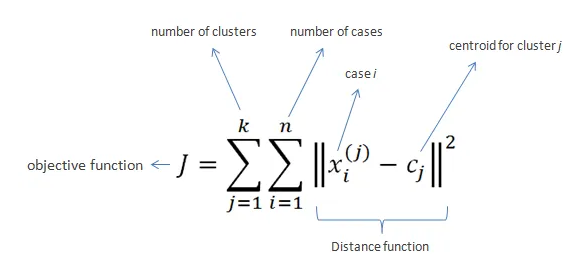

Burada:
- \(k\), küme sayısını temsil eder.
- \(n_i\), \(i\)-inci kümedeki veri noktalarının sayısını temsil eder.
- \(x_{ij}\), \(i\)-inci kümedeki \(j\)-inci veri noktasını temsil eder.
- \(c_i\), \(i\)-inci kümenin merkezini temsil eder.

**Inertia'nın küçük olması**, küme merkezlerinin veri noktalarına daha yakın olduğunu ve böylece kümeleme **modelinin daha iyi performans gösterdiğini gösterir**. Kullanıcılar genellikle küme sayısını belirlemek için "elbow method" gibi teknikleri kullanarak inertia değerlerini analiz ederler. Elbow methodunda inertia değerlerinin grafikte bir dirseğe benzediği küme sayısını seçmek, optimal küme sayısını belirlemede yardımcı olabilir.

## Optimum Küme Sayısının Belirlenmesi

K-means kümeleme algoritması sırasında kullanılan bir başka ölçü olan **"Inertia" aslında SSE'nin bir türüdür**. Inertia, küme merkezlerine olan uzaklıkların karelerinin toplamını ifade eder. SSE, regresyon modellerinde de kullanılır ve gerçek değerler ile modelin tahmin ettiği değerler arasındaki farkların karelerini toplar.

SSE'nin küçük olması, modelin veri noktalarını daha iyi açıkladığı veya küme merkezlerine daha yakın olduğu anlamına gelir. Bu ölçü, modelin ne kadar iyi uyarlandığını veya kümeleme algoritmasının ne kadar iyi performans gösterdiğini değerlendirmek için kullanılır.

In [14]:
# Farklı küme sayıları için SSE (Sum of Squared Errors) hesaplayarak 
# Elbow yöntemi ile optimum küme sayısını belirleme

kmeans = KMeans()
ssd = []
K = range(1, 30)

# Her bir K değeri için KMeans modelini eğitme
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    # Her k değeri için oluşturulan modelde elde edilen inertia değerini
    # ssd dizinie aktardık.
    ssd.append(kmeans.inertia_)

# SSD değerlerini yazdırdık.
print("Sum of Squared Errors=",ssd)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Sum of Squared Errors= [13.184122550256445, 6.596893867946196, 5.010878493006417, 3.683456153585913, 3.2498708511065924, 2.8373711751433066, 2.6092871883382704, 2.3753532801609243, 2.0638562625162082, 1.850900246143518, 1.670112234514309, 1.48211144028382, 1.3648661824036248, 1.2999896826836495, 1.1948715869439575, 1.14427282668102, 1.0274722046133686, 0.965049047259407, 0.9294661424041379, 0.8686430359698878, 0.8313998978678443, 0.7474573762548193, 0.6755829610490789, 0.6263239476808393, 0.579118291122158, 0.5336568048777836, 0.48578644420595685, 0.44512174236917323, 0.39001110795387434]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Burdan yorum yapmak zor gözüküyor o yüzden grafik incelemesi yapalım;

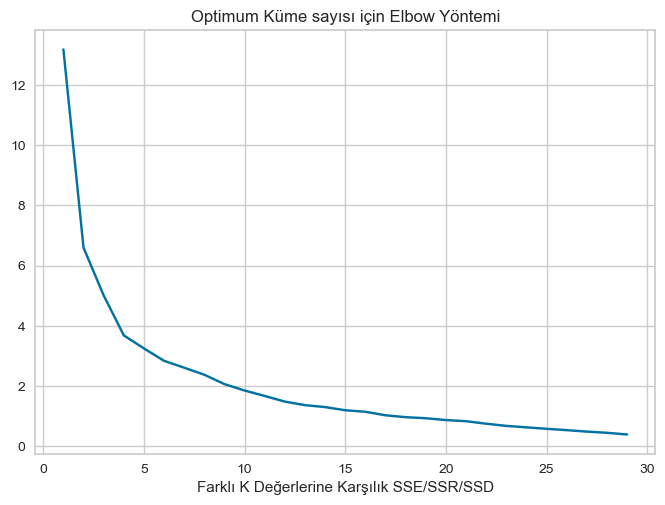

In [15]:
# Elbow yöntemi grafiği
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

Direkselenmenin başladığı nokta küme sayısı olarak seçileceğini söylemiştik. Grafiği incelediğimizde dirseklenme 4-6 arasında başlıyor gibi gözüküyor. Bu işlem için daha kesin bir yöntem var onu uygulayalım; 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

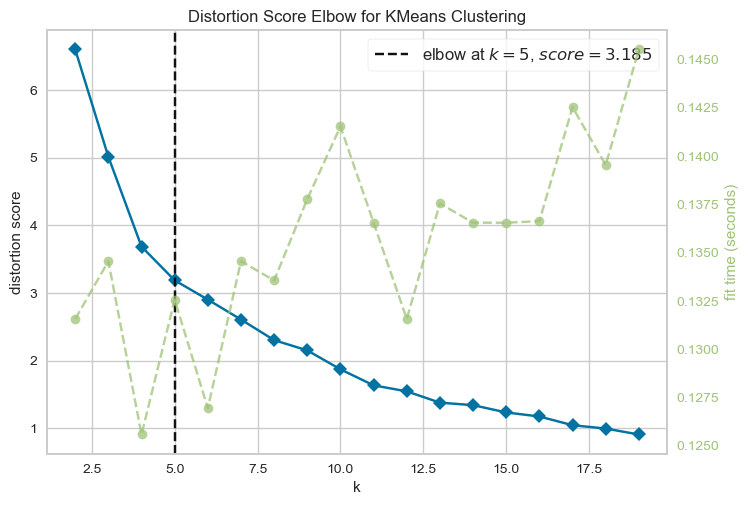

5

In [16]:
# Elbow yöntemi ile optimum küme sayısını gösteren görselleştirme
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

# Elbow yöntemi ile bulunan optimum küme sayısı
elbow.elbow_value_


Grafikten görebileceğimiz gibi **optimum küme sayımız 6** olarak belirlenmiştir.

## Final Cluster'ların Oluşturulması

In [17]:
# Elbow yöntemi ile belirlenen optimum küme sayısı ile KMeans modelini eğitme
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
# KMeans modelinin özellikleri
print("Number of clusters:", kmeans.n_clusters)
print("\nCluster Centers:")
print(kmeans.cluster_centers_)
print("\nCluster Labels:")
print(kmeans.labels_)


Number of clusters: 5

Cluster Centers:
[[0.25033467 0.27549467 0.81544256 0.27103072]
 [0.3939759  0.38356164 0.53050847 0.33953488]
 [0.13805221 0.10616438 0.34039548 0.1171404 ]
 [0.83562823 0.70645793 0.37772397 0.37172388]
 [0.6124498  0.75       0.75423729 0.67980189]]

Cluster Labels:
[3 4 4 1 4 4 0 1 4 3 0 2 4 1 2 1 1 3 2 4 0 4 2 3 1 2 2 4 2 0 4 4 3 2 0 1 1
 0 0 3 2 3 4 0 2 1 0 2 2 1]


In [19]:
# Veri setinin ilk 5 gözlemi ve bu gözlemlerin tahmini küme etiketleri
df[0:5]


array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

Hangi eyalet hangi sınıfda olduğunu bilmiyoruz. Hem gözlem birimlerinin ismi yok hem de hangi gözlem biriminin hangi sınıfa ait olduğu bilgisi yok. Bunları düzenlememiz gerekiyor.

In [20]:
# KMeans ile tahmin edilen küme etiketlerini saklama
clusters_kmeans = kmeans.labels_

# Veri setini tekrar yükleme
df = pd.read_csv("datasets/USArrests.csv", index_col=0)

# Veri setine tahmin edilen küme etiketlerini ekleyerek gözlemleme
df["cluster"] = clusters_kmeans

# Veri setini gözlemleyelim
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,4
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,4


Görüldüğü üzere clusterlar geldi. Şimdi Hangi eyalet hangi clusterda bunu görelim;

In [21]:
# Küme etiketlerini 1'den başlatma
df["cluster"] = df["cluster"] + 1

# Belirli bir küme etiketine sahip gözlemleri filtreleme
df[df["cluster"]==5]

,Murder,Assault,UrbanPop,Rape,cluster
Alaska,10.0,263,48,44.5,5
Arizona,8.1,294,80,31.0,5
California,9.0,276,91,40.6,5
Colorado,7.9,204,78,38.7,5
Florida,15.4,335,80,31.9,5
Illinois,10.4,249,83,24.0,5
Maryland,11.3,300,67,27.8,5
Michigan,12.1,255,74,35.1,5
Nevada,12.2,252,81,46.0,5
New Mexico,11.4,285,70,32.1,5


Sadece 5. kümeye ait olan bilgiler yukarıda yer almakdatır. Şimdi ise tüm kümelere hakkında yorum yapabilmek için istatistiksel bilglerini inceleyelim.

In [22]:
# Küme bazında istatistiksel bilgileri gösterme
df.groupby("cluster").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1            9   4.955556    4.4       9  125.444444  120.0        9   
2           10   7.340000    7.0      10  157.000000  157.5       10   
3           12   3.091667    2.6      12   76.000000   76.5       12   
4            7  14.671429   14.4       7  251.285714  249.0        7   
5           12  10.966667   11.2      12  264.000000  259.0       12   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        80.111111   80.0     9  17.788889  18.80  
2        63.300000   65.5    10  20.440000  19.75  
3        52.083333   53.5    12  11.833333  11.25  
4        54.285714   58.0     7  21.685714  22.20  
5        76.500000   80.0    12  33.608333  32.00

In [23]:
# Oluşturulan küme etiketlerini içeren veri setini CSV dosyasına kaydetme
df.to_csv("clusters.csv")

Aynı veri seti üzerinden birde hiyerarşik kümeleme yöntemini uygulayalım

# Hierarchical Clustering 

Hierarchical Clustering (Hiyerarşik Kümeleme), bir veri setindeki benzer örnekleri gruplandırmak için kullanılan bir kümeleme algoritmasıdır. Bu algoritma, veri noktalarını bir hiyerarşiye göre düzenleyerek çalışır. Bu hiyerarşi genellikle bir ağaç yapısı olarak temsil edilir ve bu nedenle bu yöntem ağaç benzeri bir yapı oluşturduğu için "hiyerarşik" olarak adlandırılır.

Hierarchical Clustering, iki ana türde uygulanabilir:

1. **Agglomerative (Birleştirici) Hierarchical Clustering:**
   - Her veri noktasını bir küme olarak başlatır ve ardından benzer olan küme veya veri noktalarını birleştirir.
   - Adım adım küme birleştirmesi yaparak, tüm veri noktalarını veya kümeleme sonlandırma kriterini karşılayana kadar devam eder.
   - Sonuç olarak, bir ağaç yapısı elde edilir, bu ağaç yapısında en alt düzeydeki düğümler veri noktalarını, en üst düzeydeki düğümler ise tüm veri setini temsil eder.

2. **Divisive (Bölücü) Hierarchical Clustering:**
   - Tüm veri setini tek bir küme olarak başlatır ve ardından bu küme içindeki en uzak veya en farklı örnekleri ayırarak alt kümeler oluşturur.
   - Adım adım küme bölmesi yaparak, tüm veri noktalarını veya kümeleme sonlandırma kriterini karşılayana kadar devam eder.
   - Sonuç olarak, bir ağaç yapısı elde edilir, bu ağaç yapısında en üst düzeydeki düğüm tüm veri setini, en alt düzeydeki düğümler ise veri noktalarını temsil eder.

Hierarchical Clustering, kümeleme sonuçlarını görselleştirmek ve kümeleme için optimum sayıda küme seçimini yapmak gibi avantajlar sağlar. Ancak, büyük veri setlerinde hesaplama maliyeti nedeniyle pratikte bazen sınırlı kullanılabilir.

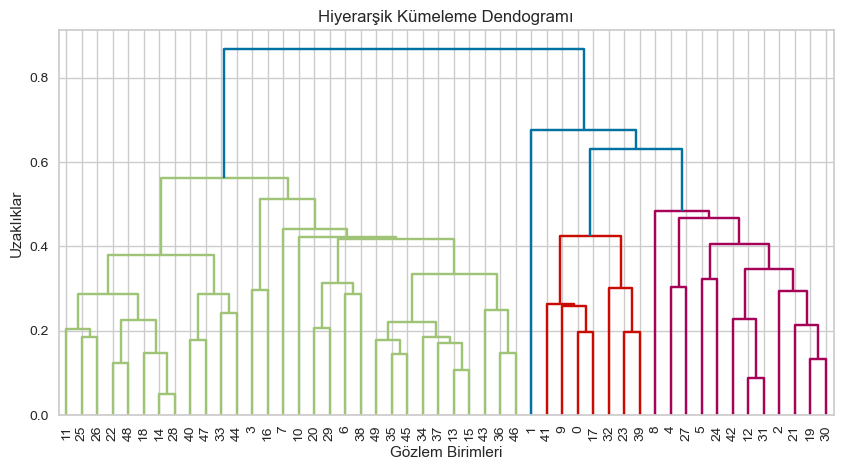

In [24]:
# Veri setini yükleme ve Min-Max ölçeklendirme uygulama
df = pd.read_csv("datasets/USArrests.csv", index_col=0)
# Uzaklık temelli olduğu için standartlaştırma işlemini gerçekleştirelim
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

# Hiyerarşik kümeleme (average linkage) ile dendrogram oluşturma
hc_average = linkage(df, "average")

# Tüm gözlemleri içeren dendrogramı çizme
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")  # Grafik başlığı
plt.xlabel("Gözlem Birimleri")  # X ekseni etiketi
plt.ylabel("Uzaklıklar")  # Y ekseni etiketi
# Hiyerarşik kümeleme dendrogramını çizme
dendrogram(hc_average, leaf_font_size=10)  
plt.show()  # Grafikleri gösterme


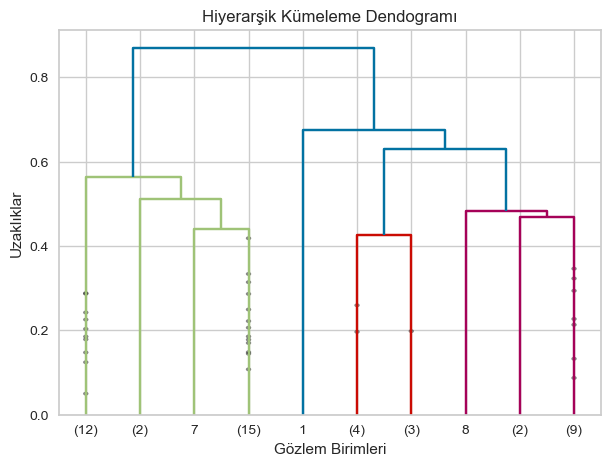

In [25]:
# İlk 10 gözlemi içeren ve dalları gösteren dendrogramı çizme
plt.figure(figsize=(7, 5))  # Şeklin boyutunu belirleme
plt.title("Hiyerarşik Kümeleme Dendogramı")  # Grafik başlığı
plt.xlabel("Gözlem Birimleri")  # X ekseni etiketi
plt.ylabel("Uzaklıklar")  # Y ekseni etiketi

# Hiyerarşik kümeleme modelinin dendrogramını çizme
dendrogram(hc_average, truncate_mode="lastp", p=10, show_contracted=True, leaf_font_size=10)
# Grafikleri gösterme
plt.show() 

Dendograma bakarak kaç küme olacağı hakkında yorum yapılabilir. 

## Kume Sayısını Belirlemek

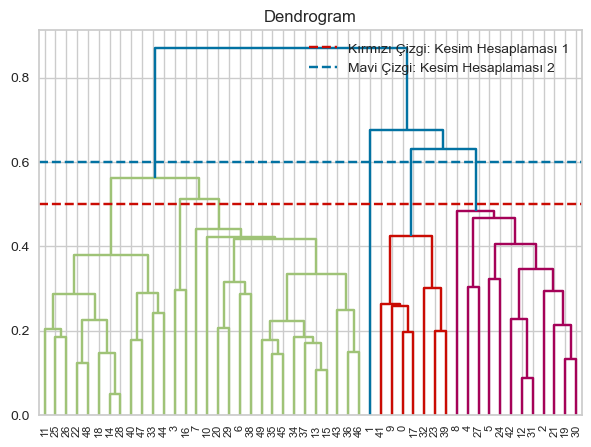

In [26]:
# Belirli bir yükseklik için dendrogram çizme
plt.figure(figsize=(7, 5))
plt.title("Dendrogram")
dend = dendrogram(hc_average)

# Kırmızı ve mavi kesim çizgilerini ekleyerek dendrogramı daha iyi anlama
plt.axhline(y=0.5, color='r', linestyle='--', label='Kırmızı Çizgi: Kesim Hesaplaması 1')
plt.axhline(y=0.6, color='b', linestyle='--', label='Mavi Çizgi: Kesim Hesaplaması 2')
plt.legend()
plt.show()


Kesikli çizgilerden yorumlayacak olursak;

0.6 dan (mavi çizgi) kesersek küme sayımız 4 olacaktır.

0.5 den (kırmızı çizgi) kesecek olursak küme sayımız 6 olacaktır.

Sınıf sayımızı k-means yönteminde olduğu gibi 6 olarka karar verelim ve modelimizi oluşturalım.

## Final Modeli Oluşturmak

In [27]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Hiyerarşik kümeleme modelini oluşturma
# küme sayımızı 6 olarak belirledik
cluster = AgglomerativeClustering(n_clusters=6, linkage="average")

# Verileri kümeleme
clusters = cluster.fit_predict(df) # cluster.fit olarak da kullanılablir

clusters

array([3, 5, 0, 2, 0, 0, 1, 1, 0, 3, 1, 4, 0, 1, 4, 1, 2, 3, 4, 0, 1, 0,
       4, 3, 0, 4, 4, 0, 4, 1, 0, 0, 3, 4, 1, 1, 1, 1, 1, 3, 4, 3, 0, 1,
       4, 1, 1, 4, 4, 1], dtype=int64)

In [28]:
# Veri setini tekrar yükleme
df = pd.read_csv("datasets/USArrests.csv", index_col=0)

# Oluşan küme numarasını yeni bir sütun olarak ekleyerek mevcut DataFrame'i güncelleme
df["hi_cluster_no"] = clusters

# Elde edilen DataFrame'i ekrana yazdırma
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,5
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


Cluster no sıfır gibi gözüküyor birden başlamasını sağlayalım ve karşılaştırma yapabilmek için k-means yöntemi ile bulmuş olduğumuz kümeleme sonuçlarını da getirelim;

In [29]:
# Küme numaralarını 1'den başlatma
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

# K-Means kümeleme sonuçları ile Agglomerative kümeleme sonuçlarını karşılaştırma
# "kmeans_cluster_no" sütununu doğrudan ekleyerek güncelleme
df["kmeans_cluster_no"] = clusters_kmeans + 1 

df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,4,4
Alaska,10.0,263,48,44.5,6,5
Arizona,8.1,294,80,31.0,1,5
Arkansas,8.8,190,50,19.5,3,2
California,9.0,276,91,40.6,1,5


Görüldüğü gibi iki yöntemde de eyaletler farklı kümelere atanmış. 

Hiyerarşik kümeleme de ile k-means da aynı kümeye olan eyaletler hangileri olduğunu inccelemenizi tavsiye ederim.

Aynı zamanda iki yöntem sonucunda farklı kümelere atanmış olan eyaletler ve bunların nedeni de incelenebilir.

# Principal Component Analysis - Temel Bileşen Analizi

Principal Component Analysis (PCA), bir veri setindeki değişkenlerin sayısını azaltmak ve veri setini daha düşük boyutlu bir uzaya dönüştürmek için kullanılan bir boyut azaltma tekniğidir. PCA, özellikle çok sayıda değişken içeren veri setlerinde kullanılarak gereksiz karmaşıklığı azaltabilir ve veri setindeki temel yapıyı daha iyi anlamamıza yardımcı olabilir.

PCA'nın temel amacı, orijinal değişkenlere (özelliklere) bağlı kalmadan, veri setindeki en fazla varyansı koruyarak yeni bir değişken seti oluşturmaktır. Bu yeni değişken seti, orijinal değişkenler arasındaki korelasyonu ortadan kaldırır ve değişkenler arasındaki bağımlılığı azaltır.

PCA'nın çalışma adımları şunlardır:

1. **Veri Standartlaştırma:** Değişkenleri standart hale getirerek (ortalama 0, varyans 1) PCA'nın daha iyi çalışmasını sağlar.

2. **Kovaryans Matrisi Hesaplama:** Standartlaştırılmış veri üzerinden değişkenler arasındaki kovaryansları içeren bir kovaryans matrisi oluşturulur.

3. **Özdeğer ve Özvektör Hesaplama:** Kovaryans matrisinin özdeğerleri ve özvektörleri hesaplanır.

4. **Özdeğerlerin Sıralanması:** Özdeğerler büyükten küçüğe sıralanır. Bu, en yüksek varyansa sahip bileşenleri önce almamıza olanak tanır.

5. **Özdeğerlere Göre Özvektörleri Seçme:** Özdeğerlere karşılık gelen en büyük özvektörleri seçerek yeni bileşenleri oluşturur.

6. **Yeni Veri Matrisini Oluşturma:** Seçilen özvektörleri kullanarak orijinal veriyi daha düşük boyutlu bir uzaya dönüştürür.

PCA'nın avantajları şunlardır:

- Veri setindeki boyutu azaltarak gereksiz karmaşıklığı azaltır.
- Değişkenler arasındaki bağımlılığı azaltır.
- Temel veri yapısını anlamak ve yorumlamak için kullanılabilir.

Ancak, PCA'nın bazı dezavantajları da vardır, özellikle de olası bilgi kaybıdır. Bu nedenle, PCA kullanmadan önce dikkatlice düşünülmelidir.


Özetle belirli miktarda bilgi kaybını göze alarak boyut indirgemesi yapar.

In [30]:
# Hitters veri setini okuma
df = pd.read_csv("datasets/Hitters.csv")

# Veri setinin ilk beş gözlemine göz atma
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Konumuz denetimsiz öğrenme olduğu için kategorik verilerle ve "Salary" ile ilgilenmiyoruz. O yüzden bunları veri setimizden çıkaralım;

In [31]:
# Sayısal sütunları seçme (Salary sütununu içermeyenler)
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

# Sadece sayısal sütunlardan oluşan yeni bir DataFrame oluşturma
df[num_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [32]:
# Yeni DataFrame'den eksik değerleri çıkarma
df = df[num_cols]
df.dropna(inplace=True)

# Veri setinin boyutlarını kontrol etme
df.shape

(322, 16)

Artık bağımlı değişkenimiz kalmadı. Şimdi amacımız çok değişkenli verinin daha az değişken ile ifade edilmesidir. Yani 16 olan değişken sayımızı azaltmaya çalışacağız.

In [33]:
# Veriyi standartlaştırma
df = StandardScaler().fit_transform(df)

df

array([[-0.57407148, -0.75512977, -1.12359063, ...,  0.56039893,
        -0.54092397,  1.88089921],
       [-0.43043703, -0.43173229, -0.43357884, ...,  1.2240485 ,
        -0.46774014,  0.308192  ],
       [ 0.64029256,  0.62469948,  0.83144278, ...,  2.10891458,
        -0.1823232 ,  0.93727488],
       ...,
       [ 0.61417721,  0.53846015, -0.8935867 , ..., -0.8989165 ,
         0.04454668, -0.16362016],
       [ 1.25400343,  0.92653713, -0.20357491, ...,  3.65743023,
         0.17627758,  0.62273344],
       [ 1.63267609,  1.48709276, -0.20357491, ...,  0.42481462,
        -0.75315708, -0.79270304]])

In [34]:
# PCA (Principal Component Analysis) modelini oluşturma
pca = PCA()

# PCA modelini veri üzerine uygulama
pca_fit = pca.fit_transform(df)

Bileşenlerin başarısı açıklanan varyans oranı ile belirlenir.

In [35]:
# Açıklanan varyans oranlarına bakma
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [36]:
# Kumulatif açıklanan varyans oranlarını hesaplama
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

Burada açıklama oranlarını kümülatif olarak görmekteyiz. Birinci bileşen 0.46 oranında açıklarken, ikinci bileşen geldiğinde bu oaran 0.72 ye çıkmış. Baktığımızda 5 bileşen ile %91 oranında açıklanabilir. Sonuç toplamda 1 olmalıdır. Şimdi kaç bileşen kullanmamız gerektiğine karar verelim;


# Optimum Bileşen Sayısı

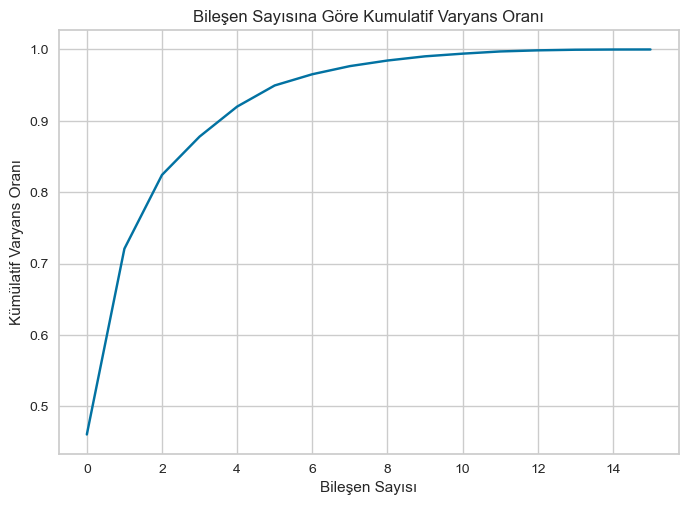

In [37]:
# PCA modelini veri üzerine uygulayarak bileşenleri bulma ve hemen kümülatif varyans oranlarını elde etme
pca = PCA().fit(df)

# Kumulatif varyans oranlarını grafiğe çizme
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Grafiği düzenleme
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı")
plt.title("Bileşen Sayısına Göre Kumulatif Varyans Oranı")
plt.show()


Veri görselleştirme gibi bir işlem yapıyorsak mümkün olduğunca az bileşen seçmemiz gerekir. 

Grafiğe bakarak bileşen sayısını 3 olarak seçerek devam edelim.

# Final PCA'in Oluşturulması

In [38]:
# PCA modelini belirli bir bileşen sayısı (3) ile uygulayarak bileşenleri bulma
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

# Her bir bileşenin açıkladığı varyans oranları
explained_variance_ratios = pca.explained_variance_ratio_
print("Açıklanan Varyans Oranları:", explained_variance_ratios)

# Kumulatif varyans oranları
cumulative_variance_ratios = np.cumsum(explained_variance_ratios)
print("Kümülatif Varyans Oranları:", cumulative_variance_ratios)


Açıklanan Varyans Oranları: [0.46037855 0.26039849 0.1033886 ]
Kümülatif Varyans Oranları: [0.46037855 0.72077704 0.82416565]


Yukarıdaki değerleri incelediğimizde bileşen tek açıklama oranı görülmekte;

- Birinci bileşen %46
- İkinci bileşen %26
- Üçüncü bileşen %10

Oranında açıklıyormuş. Kümülatif olarak baktığımızda ise üçünün toplam açıklama oranı ise %82 olduğunu görmekteyiz.

# BONUS: Principal Component Regression

Principal Component Regression (PCR), bir regresyon analizi tekniğidir ve Principal Component Analysis (PCA) ile regresyonu birleştirir. PCR, bir bağımlı değişken ile bir veya daha fazla bağımsız değişken arasındaki ilişkiyi modellemek için kullanılır.

PCR'nin temel adımları şunlardır:

1. **Veri Standartlaştırma:** Bağımsız değişkenler standart hale getirilir (ortalama 0, varyans 1).

2. **PCA Uygulama:** Bağımsız değişkenlere PCA uygulanır. Bu, bağımsız değişkenlerin sayısını azaltır ve yeni bileşenleri (principal components) elde eder.

3. **Regresyon Modeli Kurma:** Elde edilen principal components kullanılarak regresyon modeli kurulur.

PCR'nin avantajları ve kullanım durumları şunlar olabilir:

- **Çoklu Bağımsız Değişkenlerin İşlenmesi:** PCR, çok sayıda bağımsız değişkenin olduğu durumlarda kullanışlıdır. Özellikle bağımsız değişkenler arasında çoklu korelasyon varsa, PCR bu korelasyonu azaltabilir.

- **Çoklu Kolinearite Probleminin Azaltılması:** PCR, çoklu kolinearite sorunlarını hafifletebilir. Bu durumda, bağımsız değişkenler arasında yüksek korelasyon olduğunda geleneksel regresyon modelleri tahminlerde istikrarsızlık ve güven aralıklarının genişlemesi gibi sorunlarla karşılaşabilir. PCR, bu sorunları hafifletebilir.

- **Boyut Azaltma:** PCR, veri setindeki boyutu azaltarak gereksiz karmaşıklığı azaltabilir.

Ancak, PCR'nin bazı dezavantajları vardır:

- **Yorumlama Zorluğu:** PCR'nin bileşenleri, orijinal bağımsız değişkenlerle doğrudan ilişkilendirilemez ve bu nedenle modelin yorumlanması zor olabilir.

- **Overfitting Riski:** PCR, tüm bileşenleri dahil etme eğiliminde olduğu için overfitting riski taşıyabilir. Bu durumu önlemek için çapraz doğrulama gibi yöntemler kullanılabilir.

PCR, veri analizi ve modelleme süreçlerinde kullanılabilecek bir araçtır ancak uygulama bağlamına ve veri setinin özelliklerine göre dikkatlice değerlendirilmelidir.

In [39]:
# Hitters veri setini yükle
df = pd.read_csv("datasets/Hitters.csv")
df.shape  # Veri setinin boyutunu kontrol et

(322, 20)

322 gözlem birimi olduğu görülmektedir. Yani gözlem birimimiz değişmemiş.

In [40]:
len(pca_fit)  # PCA'dan elde edilen bileşen sayısını kontrol et

322

Numerik değişken sayımıza bakalım

In [41]:
# Veri setindeki sayısal sütunları bul
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(num_cols)  # Sayısal sütun sayısını kontrol et

16

16 adet var biz az önce PCA ile bu 16 değişkeni 3'e indirdik. Diğer değişkenlere (numerik olmayan) de bir göz atalım;

In [42]:
# Veri setindeki diğer sütunları bul
others = [col for col in df.columns if col not in num_cols]

print(others)

['League', 'Division', 'Salary', 'NewLeague']


PCA ile elde edilen bileşenleri bir DataFrame e çevirelim;

In [43]:
# PCA'dan elde edilen bileşenleri içeren bir veri çerçevesi oluştur
pca_df = pd.DataFrame(pca_fit, columns=["PC1", "PC2", "PC3"])
# Ekrana yazdırdık
print(pca_df)

          PC1       PC2       PC3
0   -3.240106 -0.253173  0.776066
1    0.245488  1.302951  0.118040
2    0.603883 -2.617002 -0.698183
3    3.591276  0.547821 -1.049022
4   -2.264528 -0.698898 -1.290536
..        ...       ...       ...
317 -0.089503 -0.521050 -0.770721
318  3.339811 -0.732713  3.114194
319 -0.951442 -0.910086  0.286517
320  2.091473 -2.265826 -0.192745
321  1.905622 -0.311198 -0.356249

[322 rows x 3 columns]


In [44]:
# Diğer sütunları içeren bir veri çerçevesi oluştur
others_df = df[others]
# Ekrana yazdır
print(others_df)

    League Division  Salary NewLeague
0        A        E     NaN         A
1        N        W   475.0         N
2        A        W   480.0         A
3        N        E   500.0         N
4        N        E    91.5         N
..     ...      ...     ...       ...
317      N        E   700.0         N
318      A        E   875.0         A
319      A        W   385.0         A
320      A        E   960.0         A
321      A        W  1000.0         A

[322 rows x 4 columns]


PCA ile elde ettiğimiz bileşenler ile kategorik bileşenlerimiz arasında regresyon uygulayabiliriz.

In [45]:
# PCA bileşenleri ve diğer sütunları birleştir
final_df = pd.concat([pca_df, others_df], axis=1)
final_df.head()  # Sonuçları görüntüle

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


Görüldüğü üzere 16 bileşen 3'e indirildi. 16 bileşenin %82 sini bu 3 bileşen ile açıklamak mümkündür. 3 tane de kategorik değişkenmiz var ve bunların sınıf sayısı iki, bu nedenle Label Encoder ile binary (1-0) çevirebiliriz.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def label_encoder(dataframe, binary_col):
    """
    Veri çerçevesinde belirli bir ikili sütunu etiketlemek için LabelEncoder kullanma.

    Parameters:
    - dataframe: Etiketleme işlemi uygulanacak olan veri çerçevesi.
    - binary_col: Etiketleme işlemi uygulanacak ikili sütunun adı.

    Returns:
    - dataframe: Etiketlenmiş veri çerçevesi.
    """
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df, col)
    

Bu fonksiyon, belirtilen veri çerçevesindeki belirli bir ikili sütunu etiketlemek için kullanılabilir. Etiketleme işlemi, **LabelEncoder** sınıfı kullanılarak gerçekleştirilir. Fonksiyon, etiketlenmiş veri çerçevesini döndürür. Etiketleme işlemi, ikili (binary) sütunu 0 ve 1 olarak kodlar, bu da genellikle makine öğrenimi modellerinde kategorik verileri işlemek için gereklidir.

In [47]:
# Etiketlenmiş veri çerçevesini ekrana yazdırma
print(final_df)

          PC1       PC2       PC3  League  Division  Salary  NewLeague
0   -3.240106 -0.253173  0.776066       0         0     NaN          0
1    0.245488  1.302951  0.118040       1         1   475.0          1
2    0.603883 -2.617002 -0.698183       0         1   480.0          0
3    3.591276  0.547821 -1.049022       1         0   500.0          1
4   -2.264528 -0.698898 -1.290536       1         0    91.5          1
..        ...       ...       ...     ...       ...     ...        ...
317 -0.089503 -0.521050 -0.770721       1         0   700.0          1
318  3.339811 -0.732713  3.114194       0         0   875.0          0
319 -0.951442 -0.910086  0.286517       0         1   385.0          0
320  2.091473 -2.265826 -0.192745       0         0   960.0          0
321  1.905622 -0.311198 -0.356249       0         1  1000.0          0

[322 rows x 7 columns]


In [48]:
# Veri setindeki NaN değerleri attık
final_df.dropna(inplace=True)

print(final_df)

          PC1       PC2       PC3  League  Division  Salary  NewLeague
1    0.245488  1.302951  0.118040       1         1   475.0          1
2    0.603883 -2.617002 -0.698183       0         1   480.0          0
3    3.591276  0.547821 -1.049022       1         0   500.0          1
4   -2.264528 -0.698898 -1.290536       1         0    91.5          1
5    1.229535 -1.825093  3.659220       0         1   750.0          0
..        ...       ...       ...     ...       ...     ...        ...
317 -0.089503 -0.521050 -0.770721       1         0   700.0          1
318  3.339811 -0.732713  3.114194       0         0   875.0          0
319 -0.951442 -0.910086  0.286517       0         1   385.0          0
320  2.091473 -2.265826 -0.192745       0         0   960.0          0
321  1.905622 -0.311198 -0.356249       0         1  1000.0          0

[263 rows x 7 columns]


In [49]:
# Bağımlı değişken (Salary) ve bağımsız değişkenler (X) oluşturuluyor
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

In [50]:
# Doğrusal Regresyon Modeli Oluşturma
lm = LinearRegression()

# Çapraz Doğrulama ile Hata Hesaplama
# cross_val_score fonksiyonu, belirtilen sayıda parçaya bölen veri seti üzerinde çapraz doğrulama yaparak RMSE değerini hesaplar.
rmse_lm = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))

# Ortalama Maaşın Hesaplanması
# Hedef değişken olan 'y' dizisinin ortalaması alınır.
mean_salary = y.mean()

# Sonuçları Ekrana Yazdırma
# Hesaplanan RMSE değeri ve ortalama maaş ekrana yazdırılır.
print("RMSE (Root Mean Squared Error) for Linear Regression:", rmse_lm)
print("Mean Salary:", mean_salary)


RMSE (Root Mean Squared Error) for Linear Regression: 345.60211063519677
Mean Salary: 535.9258821292775


Ortalama maaş değeri **535.93** birimdir, bu da modelin tahminlerinin veri setindeki genel maaş düzeyini temsil ettiğini gösterir. Ancak, **RMSE değeri** bu **tahminlerin gerçek değerlerden ne kadar sapma gösterdiğini** belirtir.

In [51]:
# Karar Ağacı (CART) Modeli Oluşturma ve Performans Değerlendirmesi
cart = DecisionTreeRegressor()
rmse_cart = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))

# Ekrana Yazdırma: Karar Ağacı (CART) Modeli Performansı
print("RMSE (Root Mean Squared Error) for Decision Tree (CART) Model:", rmse_cart)

RMSE (Root Mean Squared Error) for Decision Tree (CART) Model: 384.8327934304234


RMSE değerimiz daha yüksek (**396**) çıktı. Yani hata daha fazla birde hiperparametre optimizasyonu yaparak deneyelim.

In [52]:
# Karar Ağacı (CART) Modeli İçin Hiperparametre Ayarlama
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

# Ekrana Yazdırma: Hiperparametre Ayarlama Parametreleri
print("Hyperparameter Tuning Parameters for Decision Tree (CART) Model:", cart_params)


Hyperparameter Tuning Parameters for Decision Tree (CART) Model: {'max_depth': range(1, 11), 'min_samples_split': range(2, 20)}


### GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

# Karar Ağacı (CART) Modeli için Hiperparametre Ayarlaması
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

# Ekrana Yazdırma: En İyi Parametrelerle Karar Ağacı (CART) Modeli
print("Best Parameters for Decision Tree (CART) Model after Grid Search:", cart_best_grid.best_params_)

# En iyi parametrelerle final bir Karar Ağacı modeli oluşturuluyor
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

# Ekrana Yazdırma: Final Karar Ağacı (CART) Modeli Performansı
rmse_cart_final = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))
print("RMSE (Root Mean Squared Error) for Final Decision Tree (CART) Model:", rmse_cart_final)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters for Decision Tree (CART) Model after Grid Search: {'max_depth': 3, 'min_samples_split': 19}
RMSE (Root Mean Squared Error) for Final Decision Tree (CART) Model: 330.1964109339104


Görüldüğü üzere hiperparametre optimizasyonu ile RMSE **330**'a düştü.

# Mulakatlarda Sorulabilecek Soru
--
**Elimizde bir veri seti var ama label (etiket) yok. Fakat sınıflandırma modeli oluşturmak istiyorum. Bu durumda ne yapabilirim?**

Diyelimki elimizde bin tane insan var ve bu insanların denetimsiz öğrenme ile kümeleniyor. Yeni bir müşteri geldiğinde önceki bin tane veriye bakılarak gelen müşterinin hangi kümeye ait olduğu belirleniyor. Bunu bir sınıflandırma modeline dönüştürmek için;

Öncelikle denetimsiz şekilde kümeler (4 küme oluştuğunu varsayalım) oluşturulur. Daha sonra bu kümeleri sınıflara eşitleyebilirim. Yani 4 küme varsa 4 sınıf var demektir. Bunları 4 farklı sınıf olacak şekilde etiketleyebiliriz. Daha sonra herhangi bir sınıflandırma modeli ile model oluşturulur. Yeni bir müşteri geldiğinde ise elimizdeki model ile bu müşterinin hangi sınıfa ait olduğunu tahmin edebiliriz.

# BONUS: PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme

### Breast Cancer - Meme Kanseri

In [54]:
# Pandas ayarları, tüm sütunları göster ve genişlik sınırını artır
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Meme kanseri veri setini okuma
df = pd.read_csv("datasets/breast_cancer.csv")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Görüldüğü gibi çok fazla değişkene sahip. Bunu görselleştirmek mümkün değil. Şimdi bu veri setini iki boyuta indirirek görselleştirmeye çalışalım;

In [55]:
# Hedef değişkeni (diagnosis) ve özellikleri (id sütununu hariç tutarak) belirleme
y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

Aşağıdaki fonksiyon, PCA (Principal Component Analysis) analizi uygulayan ve PCA tarafından elde edilen bileşenleri kullanarak veriyi iki boyuta indirgeyen bir işlevdir. İşlev aşağıdaki adımları içerir:

1. **Veriyi Standartlaştırma:**
   - `StandardScaler()` kullanılarak veri standartlaştırılır. Bu adım, her bir özniteliği ortalama 0 ve standart sapma 1 olacak şekilde dönüştürür.

2. **PCA Modelini Oluşturma ve Veriyi İki Boyuta İndirgeme:**
   - `PCA` sınıfından bir PCA modeli oluşturulur ve `n_components=2` parametresiyle veriyi iki boyuta indirger.

3. **PCA Dönüşüm Sonuçlarını İçeren DataFrame Oluşturma:**
   - Elde edilen PCA dönüşüm sonuçları, 'PC1' ve 'PC2' adlı iki yeni bileşeni içeren bir DataFrame'e (`pca_df`) yerleştirilir.

4. **Hedef Değişkeni DataFrame'e Ekleyerek Final DataFrame'i Oluşturma:**
   - `pca_df`'e hedef değişkeni (`y`) eklenerek, sonuç olarak elde edilen DataFrame final bir DataFrame (`final_df`) oluşturulur.

5. **Sonuçları Döndürme:**
   - Oluşturulan final DataFrame (`final_df`) döndürülerek, PCA analizi sonucunda elde edilen veri seti elde edilir.

Bu fonksiyonun kullanımı, veriyi daha düşük boyutlu bir uzayda temsil etmek ve bu yeni temsilin üzerinde analizler yapmak istendiğinde yararlı olabilir. Özellikle görselleştirme ve özniteliklerin etkileşimlerini daha anlaşılır bir şekilde inceleme amacına hizmet edebilir.

In [56]:
def create_pca_df(X, y):
    # Veriyi standartlaştır
    X = StandardScaler().fit_transform(X)
    
    # PCA modelini oluştur ve veriyi iki boyuta indirge
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    
    # PCA dönüşüm sonuçlarını içeren DataFrame'i oluştur
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    
    # Hedef değişkeni DataFrame'e ekleyerek final DataFrame'i oluştur
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    
    return final_df

# PCA analizi uygula ve sonucu pca_df değişkenine atıyoruz
pca_df = create_pca_df(X, y)

print(pca_df)

           PC1        PC2 diagnosis
0     9.192837   1.948583         M
1     2.387802  -3.768172         M
2     5.733896  -1.075174         M
3     7.122953  10.275589         M
4     3.935302  -1.948072         M
..         ...        ...       ...
564   6.439315  -3.576817         M
565   3.793382  -3.584048         M
566   1.256179  -1.902297         M
567  10.374794   1.672010         M
568  -5.475243  -0.670637         B

[569 rows x 3 columns]


Görüldüğü üzere veri setimizi **iki bileşene** indirgedik. Şimdi bunları görselleştirelim. 

Bu fonksiyon, PCA analizi sonucunda elde edilen iki bileşeni (PC1 ve PC2) kullanarak veriyi görselleştirmek için tasarlanmıştır.

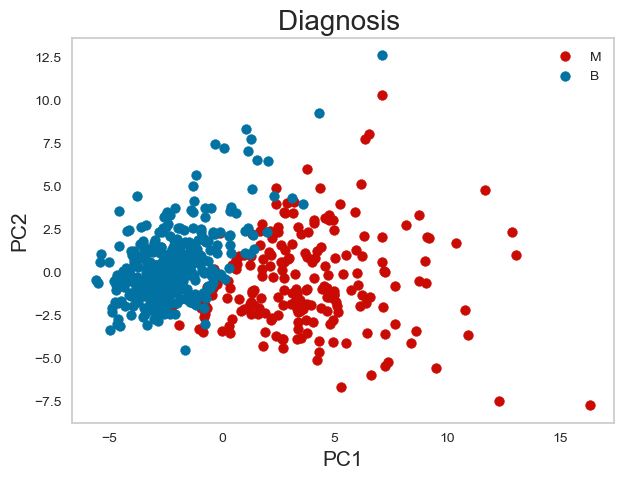

In [57]:
def plot_pca(dataframe, target):
    # Görselleştirme için bir figür oluştur
    fig = plt.figure(figsize=(7, 5))
    
    # Alt grafiği ekleyerek x ve y eksenlerini etiketle
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    # Hedef değişkenin benzersiz değerlerini al
    targets = list(dataframe[target].unique())
    
    # Benzersiz renkler kullanarak her bir hedef değeri için bir scatter plot çiz
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    
    # Hedef değişkeninin benzersiz değerlerine göre legend ekle
    ax.legend(targets)
    
    # Izgara ekle
    ax.grid()
    
    # Görseli göster
    plt.show()

# PCA sonuçlarını ve hedef değişkeni içeren DataFrame'i kullanarak görselleştirme yap
plot_pca(pca_df, "diagnosis")


Görüldüğü üzere çok fazla bileşen ait olan veri setini iki bileşene indirerek görselleştirme işlemini gerçekleştirdik. Şimdi aynı işlemi başka bir veri seti üzerinden gerçekleştirelim;

# Iris

In [61]:
# sklearn kütüphanesinden Iris veri kümesini yükle
from sklearn.datasets import load_iris
import pandas as pd

# Iris veri kümesini yükle
iris = load_iris()

# Veri kümesini DataFrame'e dönüştür
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# DataFrame'i ekrana yazdır
print("Iris Veri Kümesi (İlk 5 Satır):\n", df.head())

Iris Veri Kümesi (İlk 5 Satır):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Fonksiyona gönderilecek olan x değerlerinin sayısal olması gerekmektedir. Eğer kategorik değişken varsa gerekli işlemleri yaparak fonksiyona o şekilde gönderin. 

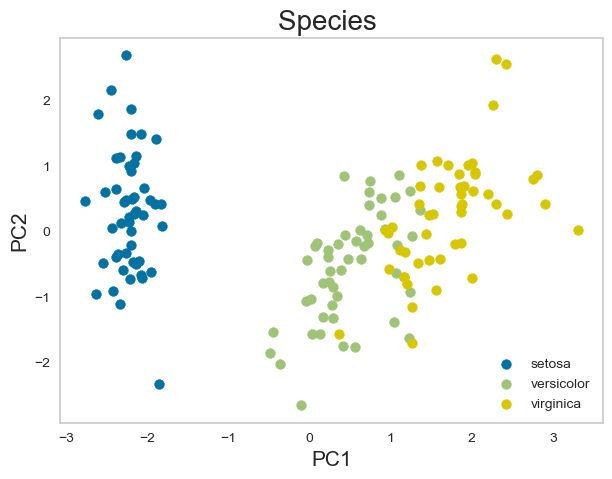

In [58]:
# "species" sütununu ekleyerek hedef değişkeni tanımla
df["species"] = iris.target_names[iris.target]

# Hedef değişken ve özellikleri belirle
y = df["species"]
X = df.drop(["species"], axis=1)

# create_pca_df fonksiyonunu kullanarak PCA sonuçlarını oluştur
pca_df = create_pca_df(X, y)

# plot_pca fonksiyonunu kullanarak PCA sonuçlarını görselleştir
plot_pca(pca_df, "species")


Artık elimizdeki herhangi bir veri setini **create_pca** fonksiyonu ile bileşen sayısını indirgeyebilir ve bu indirgenmiş veri setini **plot_pca** fonksiyonu ile görselleştirebiliriz.

Aynı işlemi diabet veri seti için uygulayalım;

# Diabetes

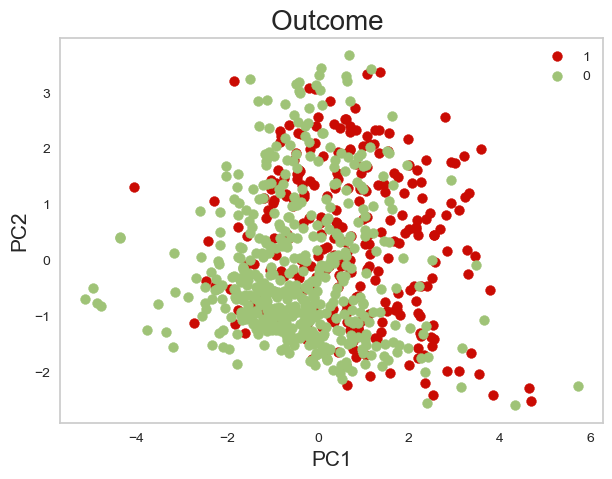

In [24]:
# Diabetes veri kümesini yükle
df = pd.read_csv("datasets/diabetes.csv")

# Hedef değişken ve özellikleri belirle
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

# PCA sonuçlarını oluştur
pca_df = create_pca_df(X, y)

# PCA sonuçlarını görselleştir
plot_pca(pca_df, "Outcome")


Diabet veri setindeki sınıflar çok iç içe gözüküyor. Sınıflandırma işlemi zor yorumu yapabiliriz.